<a href="https://colab.research.google.com/github/chaeyeonlee0417/VITAmin/blob/main/%EB%B9%84%ED%83%80%EB%AF%BC_13_14%EA%B8%B0_13%EC%A3%BC%EC%B0%A8_%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EC%B1%84%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2조

### Q1. 다차원 배열의 계산(6점)
  - 발표자료 13p의 내용을 참고하여 활성화 함수가 ReLU이고, $h_1 = g(-0.6x_1 + 0.4x_2 - 40)$, $h_2 = g(0.7x_1 - 0.3x_2 - 30)$, $o = g(120h_1 + 80h_2 - 90)$ 일 때 $h_1, h_2, o$를 구하는 코드를 구현하세요.

In [ ]:
import numpy as np

# 변수 설정
x1 = np.arange(-100, 100, 1)
x2 = np.arange(-100, 100, 1)
x1, x2 = np.meshgrid(x1, x2)

# YOUR_CODE
def relu(x):
    return np.maximum(0, x)
h1 = relu(-0.6 * x1 + 0.4 * x2 - 40)
h2 = relu(0.7 * x1 - 0.3 * x2 - 30)
o = relu(120 * h1 + 80 * h2 - 90)

# 결과 출력
print("h1:", h1)
print("h2:", h2)
print("o:", o)

h1: [[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 ...
 [58.8 58.2 57.6 ...  0.   0.   0. ]
 [59.2 58.6 58.  ...  0.   0.   0. ]
 [59.6 59.  58.4 ...  0.   0.   0. ]]
h2: [[ 0.   0.   0.  ... 67.9 68.6 69.3]
 [ 0.   0.   0.  ... 67.6 68.3 69. ]
 [ 0.   0.   0.  ... 67.3 68.  68.7]
 ...
 [ 0.   0.   0.  ...  8.8  9.5 10.2]
 [ 0.   0.   0.  ...  8.5  9.2  9.9]
 [ 0.   0.   0.  ...  8.2  8.9  9.6]]
o: [[   0.    0.    0. ... 5342. 5398. 5454.]
 [   0.    0.    0. ... 5318. 5374. 5430.]
 [   0.    0.    0. ... 5294. 5350. 5406.]
 ...
 [6966. 6894. 6822. ...  614.  670.  726.]
 [7014. 6942. 6870. ...  590.  646.  702.]
 [7062. 6990. 6918. ...  566.  622.  678.]]


### Q2. MNIST 데이터셋을 활용한 신경망 모델 학습 (20점)

2-1) 2점
- torchvision 라이브러리를 사용하여 MNIST 데이터셋을 불러오세요.

In [3]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# MNIST 데이터셋 다운로드 및 로드
train_data = datasets.MNIST(root='./datasets/', train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root='./datasets/', train=False, transform=transforms.ToTensor(), download=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5476181.39it/s] 


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159467.13it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1514217.45it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2858293.89it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



2-2) 2점
- torch.utils.data.DataLoader를 사용하여 데이터 로더를 생성하세요. 배치 크기는 128로 설정하세요.

In [4]:
from torch.utils.data import DataLoader

# 데이터 로더 생성
train_loader = DataLoader(dataset=train_data, batch_size=128, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_data, batch_size=128, shuffle=False, num_workers=4)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


2-3) 5점
- MNIST 데이터를 위한 간단한 신경망 모델을 구현하세요.

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# 신경망 모델 정의
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input tensor
        x = F.relu(self.fc1(x))  # 첫 번째 완전 연결층에 ReLU 활성화 함수 적용
        x = F.relu(self.fc2(x))  # 두 번째 완전 연결층에 ReLU 활성화 함수 적용
        x = F.log_softmax(self.fc3(x), dim=1)  # 출력층에 로그 소프트맥스 활성화 함수 적용
        return x

model = MNISTModel()

2-4) 3점
- 손실 함수와 최적손실 함수와 최적화 기법을 설정하세요.

In [6]:
import torch.optim as optim

# 손실 함수와 최적화 기법 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

2-5) 4점
- 에포크 당 손실을 출력하는 모델 학습 루프를 구성하세요.

In [7]:
import torch

# 모델 학습 루프
num_epochs = 5

# CUDA가 가능한지 확인 후, 가능한 경우 GPU 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        # 입력 데이터와 레이블을 선택한 장치로 이동
        images, labels = images.to(device), labels.to(device)

        # 기울기 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 최적화
        loss.backward()
        optimizer.step()

        # 손실 누적
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")


Epoch [1/5], Loss: 0.42170305647003625
Epoch [2/5], Loss: 0.17397060539962642
Epoch [3/5], Loss: 0.12291910032680167
Epoch [4/5], Loss: 0.09322864928447616
Epoch [5/5], Loss: 0.07559960178617857


2-6) 4점
- 테스트 데이터셋을 사용하여 모델의 성능을 평가하세요. 정확도를 출력하세요.

In [8]:
# 모델 평가
model.eval()  # 모델을 평가 모드로 전환
correct = 0
total = 0

with torch.no_grad():  # 평가 시에는 기울기를 계산하지 않음
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 96.75%


### Q3. CIFAR-10 데이터셋을 활용한 신경망 모델 학습 (24점)

3-1) 2점
- torchvision 라이브러리를 사용하여 CIFAR-10 데이터셋을 불러오세요.

In [9]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

# CIFAR-10 데이터셋 다운로드 및 로드
train_data = CIFAR10(root='./datasets/', train=True, transform=transforms.ToTensor(), download=True)
test_data = CIFAR10(root='./datasets/', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 170498071/170498071 [00:11<00:00, 15465717.98it/s]


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets/
Files already downloaded and verified


3-2) 2점
- torch.utils.data.DataLoader를 사용하여 데이터 로더를 생성하세요. 배치 크기는 64로 설정하세요.

In [10]:
from torch.utils.data import DataLoader

# 데이터 로더 생성
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False, num_workers=4)

3-3) 5점
- CNN 모델 코드의 빈칸을 채워 실행하세요.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# CNN 모델 정의
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # 첫 번째 합성곱 층: 입력 채널 3, 출력 채널 32, 커널 크기 3x3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        # 두 번째 합성곱 층: 입력 채널 32, 출력 채널 64, 커널 크기 3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # 첫 번째 완전 연결층: 입력 노드 수 64*8*8, 출력 노드 수 128
        self.fc1 = nn.Linear(in_features=64*8*8, out_features=128)
        # 두 번째 완전 연결층: 입력 노드 수 128, 출력 노드 수 10 (클래스 수)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        # 첫 번째 합성곱 층 + ReLU + 최대 풀링
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        # 두 번째 합성곱 층 + ReLU + 최대 풀링
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        # 텐서를 1차원으로 펼침
        x = x.view(-1, 64*8*8)
        # 첫 번째 완전 연결층 + ReLU
        x = F.relu(self.fc1(x))
        # 두 번째 완전 연결층 (출력층)
        x = self.fc2(x)
        return x

# 모델 초기화
cnn_model = CNNModel()

3-4) 5점
- CNN 모델 학습 및 평가 코드의 빈칸을 채워 실행하세요.

In [15]:
import torch.optim as optim

# 손실 함수와 최적화 기법 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# CUDA가 가능한지 확인 후, 가능한 경우 GPU 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cnn_model.to(device)

# 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# 모델 평가
cnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Epoch 1, Loss: 1.4767164249554314
Epoch 2, Loss: 1.1253481619345866
Epoch 3, Loss: 0.9750216396720818
Epoch 4, Loss: 0.8702373854492021
Epoch 5, Loss: 0.7896781018399217
Test Accuracy: 68.97%


3-5) 5점
- RNN 모델 코드의 빈칸을 채워 실행하세요.

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        # RNN 층: 입력 차원 32*3 (이미지의 행 크기), 은닉 상태 차원 128
        self.rnn = nn.RNN(input_size=32*3, hidden_size=128, batch_first=True)
        # 완전 연결층: 입력 노드 수 128, 출력 노드 수 10 (클래스 수)
        self.fc = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        # 이미지 데이터를 (batch_size, channels, height, width)에서 (batch_size, height, width, channels)로 변환
        x = x.permute(0, 2, 3, 1)
        # 이미지를 1D 시퀀스로 변환: (batch_size, height, width, channels) -> (batch_size, height, width*channels)
        x = x.reshape(x.size(0), 32, -1)
        # RNN 연산
        out, _ = self.rnn(x)
        # 마지막 시간 단계의 출력을 완전 연결층에 통과
        out = self.fc(out[:, -1, :])
        return out

# 모델 초기화
rnn_model = RNNModel()

3-6) 5점
- RNN 모델 학습 및 평가 코드의 빈칸을 채워 실행하세요.

In [17]:
import torch.optim as optim

# 손실 함수와 최적화 기법 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

# CUDA가 가능한지 확인 후, 가능한 경우 GPU 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnn_model.to(device)

# 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    rnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = rnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# 모델 평가
rnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = rnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Epoch 1, Loss: 2.0876841900293783
Epoch 2, Loss: 1.9923619214835984
Epoch 3, Loss: 1.916878944620147
Epoch 4, Loss: 1.8405009656001234
Epoch 5, Loss: 1.801128940356662
Test Accuracy: 33.97%


## 3조. 손실함수, 수치미분(편미분), 경사하강법 - 총 50점

### 1. 손실함수와 수치미분(편미분)


Diabetes 데이터셋을 로드하고, 데이터셋의 첫 번째 특징('age')을 사용하여 목표 변수('target')를 예측하는 단순 선형 회귀 모델을 학습하세요.

In [18]:
#문제가 아닙니다.
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1. 데이터셋 로드
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 0]  # 'age' 특성 선택
y = diabetes.target

# 2. 단순 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

1.1) 평균 제곱 오차(MSE)를 계산하는 코드를 완성하시오.(5점)

In [22]:
# 3. 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y, y_pred)
# 3. 평균 절대 오차(MAE) 계산
mae = mean_absolute_error(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 0.13
MAE: 0.30


1.2) 평균 절대 오차(MAE)와 평균 제곱 오차(MSE)의 정의와 각 손실함수의 특징을 설명하시오.(5점)

평균 제곱 오차(MSE) :  MAE는 예측 값과 실제 값 사이의 절대 오차의 평균을 계산하는 손실 함수입니다.
*   특징
1.   선형성: MAE는 절대 오차의 평균을 취하기 때문에 각 오차의 기여가 동일합니다. 즉, 큰 오차가 있어도 이 값은 그 오차의 절대값으로 직접 반영됩니다.
2.   민감성: MAE는 이상치(outlier)에 덜 민감합니다. 큰 오차가 발생해도, 그 영향은 단순히 그 오차의 크기로 제한됩니다.
3.   해석 용이성: MAE는 실제 값과 예측 값 간의 평균적인 차이를 그대로 나타내므로, 직관적으로 해석하기 쉽습니다.



평균 절대 오차(MAE) : MSE는 예측 값과 실제 값 사이의 제곱 오차의 평균을 계산하는 손실 함수입니다.

*   특징


1.   제곱 오차: MSE는 오차를 제곱하여 평균을 취하기 때문에 큰 오차에 대해 더 큰 페널티를 부과합니다. 이는 모델이 큰 오차를 줄이는데 집중하게 만듭니다.
2.   MSE는 이상치(outlier)에 매우 민감합니다. 큰 오차가 발생하면 제곱으로 인해 이 값은 더 크게 반영되어 전체 MSE 값에 큰 영향을 줍니다.
3.   MSE는 오차의 제곱 평균을 나타내기 때문에, 실제 값과 예측 값 간의 차이를 직관적으로 이해하기 어렵습니다. 그러나 미분 가능성이 좋고, 수학적으로 다루기 쉬워 많은 기계 학습 알고리즘에서 사용됩니다.




특징 비교: MAE는 절대 오차를 사용하여 이상치에 덜 민감하지만, MSE는 제곱 오차를 사용하여 큰 오차에 더 큰 페널티를 부과합니다. 따라서 MSE는 큰 오차를 가진 모델을 더 강하게 조정하려는 경우에 유용하고, MAE는 더 균형 잡힌 오차를 가지도록 조정할 때 유용합니다. 이러한 특징에 따라 특정 문제에 더 적합한 손실 함수를 선택할 수 있습니다.

1.3) 위에서 학습한 모델의 예측값에 대해 특정 샘플의 입력값에 대한 손실 함수의 편미분을 계산하는 코드를 완성하시오.(5점)

In [31]:
# 함수 정의
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 수치미분 함수 정의
def numerical_derivative(f, x, h=0.01):
    return (f(x + h) - f(x - h)) / (2 * h)

# 특정 입력값 x_0 설정
x_0 = X[0][0]

# MSE 손실 함수에 대한 편미분 계산
def mse_loss_at_x0(x):
    X_new = X.copy()
    X_new[0, 0] = x
    y_pred_new = model.predict(X_new)
    ### 오류 해결을 위한 코드 추가 - Ensure y_pred_new and y are NumPy arrays for compatibility and of the same length
    y_pred_new = y_pred_new[:len(y)].reshape(-1)  # Flatten y_pred_new and truncate to match y's length
    y_numpy = y.detach().numpy()  # Convert PyTorch tensor to NumPy array
    return mse_loss(y_numpy, y_pred_new)  # Use NumPy arrays for mse_loss


# 중심차분법을 사용한 편미분 계산
derivative_at_x0 = numerical_derivative(mse_loss_at_x0, x_0)
print(f"Numerical derivative of MSE at x_0: {derivative_at_x0:.5f}")

Numerical derivative of MSE at x_0: 24519.51786


1.4) 수치미분을 사용하여 모델 파라미터를 업데이트하시오. (5점)

In [32]:
import numpy as np

# 모델 초기화
class SimpleLinearRegression:
    def __init__(self):
        self.w = 0
        self.b = 0

    def predict(self, X):
        return self.w * X + self.b

    def update_params(self, w_grad, b_grad, learning_rate=0.01):
        self.w -= learning_rate * w_grad
        self.b -= learning_rate * b_grad

# 모델 인스턴스 생성
simple_model = SimpleLinearRegression()

# 손실 함수 정의
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 손실 함수에 대한 파라미터의 편미분 계산 함수 정의
def mse_loss_wrt_params(w, b):
    simple_model.w = w
    simple_model.b = b
    y_pred = simple_model.predict(X)
    return mse_loss(y, y_pred)

# 수치미분 함수 정의
def numerical_derivative(f, x, h=0.01):
    return (f(x + h) - f(x - h)) / (2 * h)

# 특정 입력값 X 설정
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 0]  # 'age' 특성 선택
y = diabetes.target

# 수치미분을 사용하여 그래디언트 계산
w_grad = numerical_derivative(lambda w: mse_loss_wrt_params(w, simple_model.b), simple_model.w)
b_grad = numerical_derivative(lambda b: mse_loss_wrt_params(simple_model.w, b), simple_model.b)

# 파라미터 업데이트
simple_model.update_params(w_grad, b_grad)

# 업데이트된 파라미터 출력
print(f"Updated w: {simple_model.w:.5f}")
print(f"Updated b: {simple_model.b:.5f}")


Updated w: -0.01000
Updated b: 3.03267


1.5) 위의 코드를 확장하여 여러 번의 파라미터 업데이트를 수행하는 코드를 완성하시오.(5점)

In [33]:
# 여러 번의 파라미터 업데이트
num_iterations = 100
learning_rate = 0.01

for i in range(num_iterations):
    w_grad = numerical_derivative(lambda w: mse_loss_wrt_params(w, simple_model.b), simple_model.w)
    b_grad = numerical_derivative(lambda b: mse_loss_wrt_params(simple_model.w, b), simple_model.b)
    simple_model.update_params(w_grad, b_grad, learning_rate=learning_rate)
    if i % 10 == 0:
        current_loss = mse_loss(y, simple_model.predict(X))
        print(f"Iteration {i}: Loss = {current_loss:.5f}")

# 최종 파라미터와 손실 함수 값 출력
final_loss = mse_loss(y, simple_model.predict(X))
print(f"Final Loss: {final_loss:.5f}")
print(f"Final w: {simple_model.w:.5f}")
print(f"Final b: {simple_model.b:.5f}")

Iteration 0: Loss = 27283.51056
Iteration 10: Loss = 20207.58513
Iteration 20: Loss = 15479.65930
Iteration 30: Loss = 12320.00508
Iteration 40: Loss = 10207.93664
Iteration 50: Loss = 8795.73107
Iteration 60: Loss = 7851.15686
Iteration 70: Loss = 7219.10172
Iteration 80: Loss = 6795.95206
Iteration 90: Loss = 6512.48610
Final Loss: 6338.22516
Final w: -1.00772
Final b: 131.92611


### 2. 기울기 (경사하강법)

2-1) 경사 하강법이란 무엇인가요? 경사 하강법이 신경망 학습에 어떻게 사용되는지 간단히 설명하세요. (4점)

답: 경사 하강법(Gradient Descent)은 최적화 알고리즘 중 하나로, 함수의 최소값을 찾기 위해 사용됩니다. 주로 기계 학습과 신경망 학습에서 비용 함수(손실 함수)를 최소화하는 데 사용됩니다. 경사 하강법의 기본 아이디어는 함수의 기울기(미분값)를 이용하여 현재 위치에서 함수 값이 가장 빠르게 감소하는 방향으로 이동하는 것입니다.

신경망 학습에서 경사 하강법은:

1.   손실 함수 정의: 신경망의 출력과 실제 값 사이의 오차를 측정하기 위해 손실 함수를 정의합니다. 일반적인 손실 함수로는 평균 제곱 오차(MSE)와 교차 엔트로피 손실이 있습니다.

2.   순전파(Forward Propagation): 입력 데이터를 신경망에 전달하여 예측값을 계산합니다.

3.   손실 계산: 예측값과 실제 값 간의 오차를 계산하여 손실 값을 구합니다.

4.   역전파(Backward Propagation): 손실 값을 줄이기 위해 각 매개변수(가중치와 바이어스)에 대한 손실 함수의 기울기를 계산합니다. 이를 위해 체인 룰(chain rule)을 사용하여 각 층의 기울기를 순차적으로 계산합니다.

5.   매개변수 업데이트: 경사 하강법을 사용하여 신경망의 매개변수를 업데이트합니다. 기울기의 반대 방향으로 매개변수를 조정하여 손실 값을 줄입니다.

6.   반복: 이 과정을 여러 번 반복하여 신경망이 최적의 매개변수를 학습할 수 있도록 합니다.

이 과정을 통해 신경망은 주어진 데이터에 대해 점점 더 정확한 예측을 할 수 있게 됩니다. 경사 하강법은 신경망 학습의 핵심 알고리즘으로, 매개변수를 지속적으로 조정하여 모델의 성능을 향상시킵니다.

2-2) 빈칸을 채워 평균 제곱 오차(MSE)를 비용 함수로 사용하는 배치 경사 하강법을 파이썬 코드로 구현하세요. (5점)

In [34]:
# 코드를 그대로 실행하세요

import numpy as np

# 데이터셋 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [35]:
# 배치 경사 하강법 함수 정의
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((predictions - y)))
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 데이터 준비 (바이어스 항 추가)
X_b = np.c_[np.ones((len(X), 1)), X]
theta = np.random.randn(2, 1)
learning_rate = 0.01
iterations = 1000

# 배치 경사 하강법 실행
theta, cost_history = batch_gradient_descent(X_b, y, theta, learning_rate, iterations)

print(f'최종 파라미터: theta0 = {theta[0][0]}, theta1 = {theta[1][0]}')

최종 파라미터: theta0 = 4.14146131326896, theta1 = 3.040065929195248


2-3) load_diabetes 데이터셋을 사용하여 확률적 경사 하강법을 구현하세요. 각 에포크(epoch)마다 비용 함수 값을 계산하고 이를 시각화하세요. (5점)

In [36]:
# 코드를 그대로 실행하세요

from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 불러오기
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1, 1)

# 데이터 표준화
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 데이터 준비 (바이어스 항 추가)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# 초기화
theta = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.01
iterations = 1000

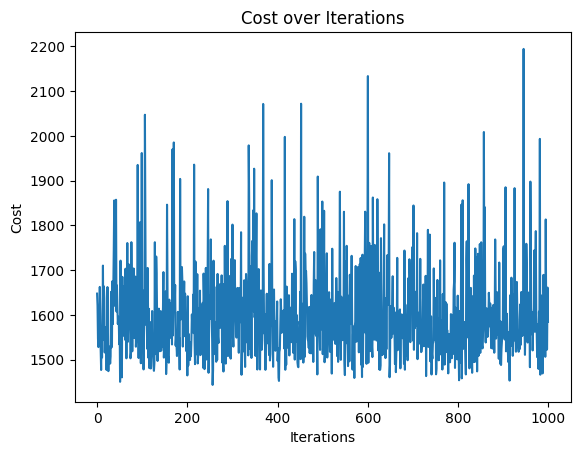

In [37]:
# 비용 함수 정의
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# 확률적 경사 하강법 함수 정의
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)
            X_i = X[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]
            gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 확률적 경사 하강법 실행
theta, cost_history = stochastic_gradient_descent(X_b, y, theta, learning_rate, iterations)

# 비용 함수 시각화
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

2-4) load_wine 데이터셋의 첫 번째 두 특징을 사용하여 미니 배치 경사 하강법을 구현하세요. 각 에포크(epoch)마다 비용 함수 값을 계산하고 이를 시각화하세요. (6점)

In [39]:
# 여기부터 문제입니다

from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 불러오기
wine = load_wine()
X = wine.data[:, :2]  # 첫 번째 두 특징 선택
y = (wine.target == 0).astype(int).reshape(-1, 1)


<ipython-input-40-59e66d4f944a>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = compute_cost(X, y, theta)


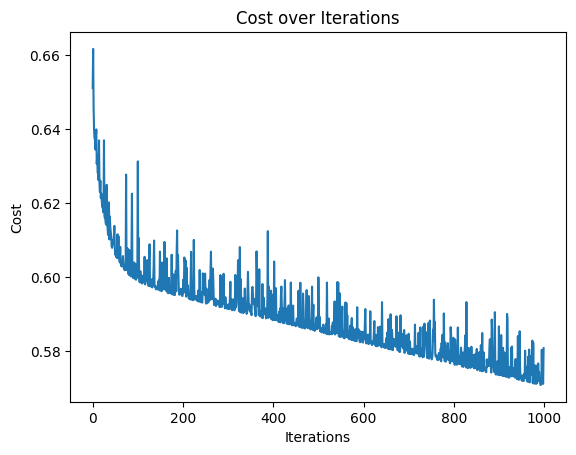

In [40]:
# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 비용 함수 정의
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5
    cost = -(1/m) * (y.T.dot(np.log(h + epsilon)) + (1 - y).T.dot(np.log(1 - h + epsilon)))
    return cost

# 미니 배치 경사 하강법 함수 정의
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            X_i = X_shuffled[j:j+batch_size]
            y_i = y_shuffled[j:j+batch_size]
            gradients = (1/batch_size) * X_i.T.dot(sigmoid(X_i.dot(theta)) - y_i)
            theta -= learning_rate * gradients

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 데이터 준비 (바이어스 항 추가)
X_b = np.c_[np.ones((len(X), 1)), X]

# 초기화
theta = np.zeros((X_b.shape[1], 1))
learning_rate = 0.01
iterations = 1000
batch_size = 20

# 미니 배치 경사 하강법 실행
theta, cost_history = mini_batch_gradient_descent(X_b, y, theta, learning_rate, iterations, batch_size)

# 비용 함수 시각화
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

2-5) 4번 문제에서 미니 배치 경사 하강법으로 학습한 모델을 사용하여 load_wine 데이터셋의 첫 번째 두 특징에 대한 예측을 수행하고, 모델의 정확도를 계산하세요. (5점)

In [41]:
from sklearn.metrics import accuracy_score

# 예측 함수 정의
def predict(X, theta):
    return sigmoid(X.dot(theta)) >= 0.5

# 예측 및 정확도 계산
y_pred = predict(X_b, theta)
accuracy = accuracy_score(y, y_pred)
print(f'모델의 정확도: {accuracy * 100:.2f}%')

모델의 정확도: 71.91%
